In [1]:
import sys
sys.path.append('..')
sys.path.append('../..')

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pickle
from DataGenerator import DataGenerator
from constants_sim import RANDOM_SEED, PARAMS, IL_COLOR, IL_XGB_COLOR

In [2]:
data_save_path = "../../../sent/simulated/sim_lin_nonlin"
std_results = pickle.load(open(f'{data_save_path}/std_results.p', 'rb'))[0]
mylin_results = pickle.load(open(f'{data_save_path}/mylin_results.p', 'rb'))[0]
xgb_table = pickle.load(open(f'{data_save_path}/res_test.p', 'rb'))
res_proportion = pickle.load(open(f'{data_save_path}/res_proportion.p', 'rb'))

In [3]:
save_path = "../../../sent/simulated/simulated_data_f1"
std_results2 = pickle.load(open(f'{save_path}/std_results.p', 'rb'))
mylin_results2 = pickle.load(open(f'{save_path}/mylin_results.p', 'rb'))[0]
xgb_table2 = pickle.load(open(f'{save_path}/res_test.p', 'rb'))
res_proportion2 = pickle.load(open(f'{save_path}/res_prop.p', 'rb'))

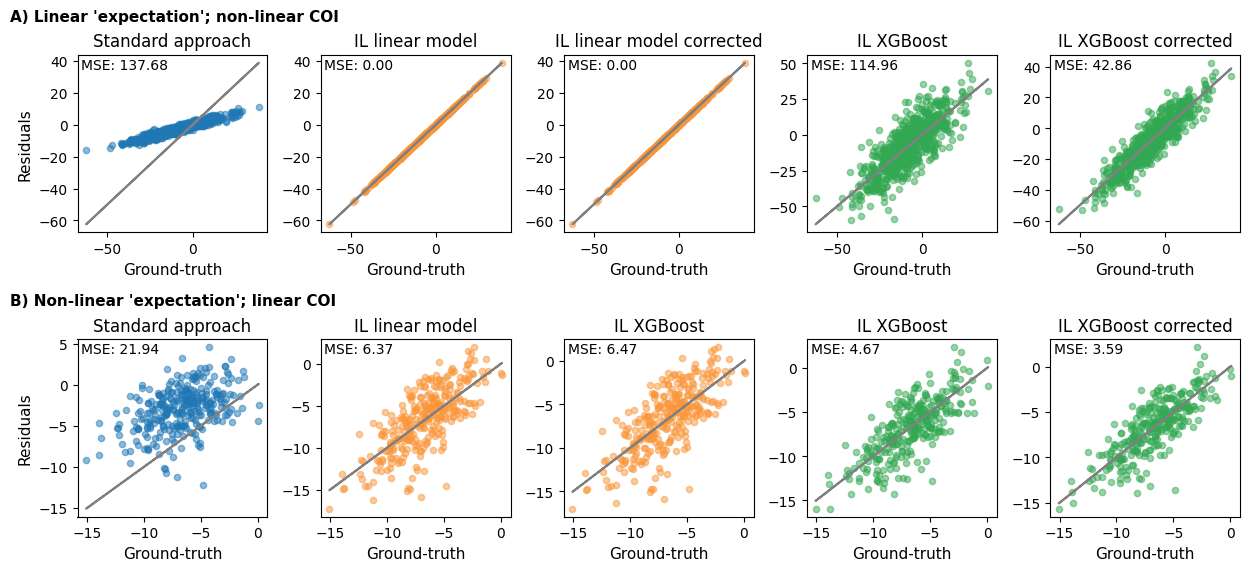

In [9]:
fontsize_mse = 11

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()
plot_titles=["IL linear model", "IL linear model corrected", "IL XGBoost", "IL XGBoost corrected"]

# UPPER PLOTS
axes[0].set_title("Standard approach")
axes[0].scatter(res_proportion, std_results["Residual"], alpha=0.5, s=20)
axes[0].plot(res_proportion, res_proportion, "-", color='grey')
plt.text(.02, .98, f"MSE: {mean_squared_error(res_proportion, std_results['Residual']):.2f}", 
                ha='left', va='top', transform=axes[0].transAxes)
axes[0].set_xlabel("True residual")

for to_plot, plot_title, ax in zip([mylin_results["Residual"], mylin_results['Corrected']],  
                                    plot_titles[::1], axes[1:3]):
    ax.set_title(plot_title)
    ax.scatter(res_proportion, to_plot, alpha=0.5, s=20, color=IL_COLOR)
    ax.plot(res_proportion, res_proportion, "-", color='grey')
    plt.text(.02, .98, f"MSE: {mean_squared_error(res_proportion, to_plot):.2f}", 
                    ha='left', va='top', transform=ax.transAxes)

# XGB Upper
for to_plot, plot_title, ax in zip([xgb_table["Residual"], xgb_table['Corrected']], 
                                plot_titles[2::], axes[3::]):
    ax.set_title(plot_title)
    ax.scatter(res_proportion, to_plot, alpha=0.5, s=20, color=IL_XGB_COLOR)
    ax.plot(res_proportion, res_proportion, "-", color='grey')
    plt.text(.02, .98, f"MSE: {mean_squared_error(res_proportion, to_plot):.2f}", 
                    ha='left', va='top', transform=ax.transAxes)

# LOWER PLOTS
axes[5].set_title("Standard approach")
axes[5].scatter(res_proportion2, std_results2["Residual"], alpha=0.5, s=20)
axes[5].plot(res_proportion2, res_proportion2, "-", color='grey')
plt.text(.02, .98, f"MSE: {mean_squared_error(res_proportion2, std_results2['Residual']):.2f}", 
                ha='left', va='top', transform=axes[5].transAxes)
axes[5].set_xlabel("True residual")

for to_plot, plot_title, ax in zip([mylin_results2["Residual"], mylin_results2['Corrected']], 
                                    plot_titles[::2], axes[6:8]):
    ax.set_title(plot_title)
    ax.scatter(res_proportion2, to_plot, alpha=0.5, s=20, color=IL_COLOR)
    ax.plot(res_proportion2, res_proportion2, "-", color='grey')
    plt.text(.02, .98, f"MSE: {mean_squared_error(res_proportion2, to_plot):.2f}", 
                    ha='left', va='top', transform=ax.transAxes)
    
## XGB Lower
for to_plot, plot_title, ax in zip([xgb_table2["Residual"], xgb_table2['Corrected']], 
                                    plot_titles[2::], axes[8::]):
    ax.set_title(plot_title)
    ax.scatter(res_proportion2, to_plot, alpha=0.5, s=20, color=IL_XGB_COLOR)
    ax.plot(res_proportion2, res_proportion2, "-", color='grey')
    plt.text(.02, .98, f"MSE: {mean_squared_error(res_proportion2, to_plot):.2f}", 
                    ha='left', va='top', transform=ax.transAxes)

plt.figtext(0.08, 0.956, "A) Linear 'expectation'; non-linear COI", ha="left", va="top", weight='bold', fontsize=11)
plt.figtext(0.08, 0.482, "B) Non-linear 'expectation'; linear COI", ha="left", va="top", weight='bold', fontsize=11)
plt.subplots_adjust(hspace = 0.6, wspace=0.28)

axes[0].set_ylabel("Residuals", fontsize=11)
axes[5].set_ylabel("Residuals", fontsize=11)
for ax in axes:
    ax.set_xlabel("Ground-truth", fontsize=11)